In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pyplot import figure

In [2]:
def vis_classification(dataframe, no_features, first_feature, last_feature, line, location_line, subset, label_line, name_sensor):
    fig, axes = plt.subplots(subset, 1, figsize=(10,6), dpi=200)
    ax = axes.ravel()
    columns = dataframe.columns
    t = dataframe["up time"]
    for i in range(first_feature,last_feature):
        # Values about appearance of anomaly 
        palette = []
        anomaly_label = dataframe.iloc[:, i+3*no_features].values
        if 0 in anomaly_label and 1 not in anomaly_label:
            palette = ["green"]
        elif 1 in anomaly_label and 0 not in anomaly_label:
            palette = ["red"]
        elif 0 in anomaly_label and 1 in anomaly_label:
            palette = ["green","red"]
            
        # Predicted sensor values
        sns.lineplot(data=dataframe, 
                     x=t, 
                     y=columns[i+no_features], 
                     ax=ax[i-first_feature], 
                     color="black",
                     label="$\hat{y}$",
                     linewidth=.6)
        
        # Target sensor values (actual sensor values)
        sns.scatterplot(data=dataframe, 
                        x=t, 
                        y=columns[i],
                        ax=ax[i-first_feature],
                        hue=columns[i+3*no_features], 
                        palette=palette,
                        s=6,
                        linewidth=.1)
        
        # Line to show known failures
        if line:
            for r, location in enumerate(location_line):
                if r == 0:
                    ax[i-first_feature].axvline(location, 0,2, color="b", linestyle ="--", linewidth=1.5, label=label_line)
                else:
                    ax[i-first_feature].axvline(location, 0,2, color="b", linestyle ="--", linewidth=1.5)
                
        # Set labels etc. 
        ax[i-first_feature].legend(loc='center left', 
                                   bbox_to_anchor=(1, 0.5),
                                   fancybox=True, 
                                   shadow=True, 
                                   ncol=1,
                                   prop={'size': 8})
        ax[i-first_feature].set_xlabel("time [in s]")
        ax[i-first_feature].set_ylabel(name_sensor[i-first_feature])
        ax[i-first_feature].set_title("Sensor No.{}".format(i))

In [3]:
def vis_reconstruction_error(dataframe, no_features, first_feature, last_feature, thresholds_mean, thresholds_max, subset):
    fig, axes = plt.subplots(subset, 1, figsize=(10,6), dpi=200)
    ax = axes.ravel()
    columns = dataframe.columns
    t = dataframe.iloc[:,0]
    for i in range(first_feature, last_feature):
        sns.lineplot(data=dataframe, 
                     x=t, 
                     y=dataframe.iloc[:, i+2*no_features],
                     ax=ax[i-first_feature],
                     color="black",
                     label="Euclidean Distance \n between $y$ and $\hat{y}$")
        
        ax[i-first_feature].axhline(thresholds_mean[i-first_feature], 
                            color="royalblue", 
                            linestyle ="--", 
                            linewidth=1,
                            label="mean reconstruction error")
        ax[i-first_feature].axhline(thresholds_max[i-first_feature], 
                                    color="royalblue", 
                                    linestyle ="-", 
                                    linewidth=1,
                                    label="max reconstruction error")
        
        # Set labels etc. 
        ax[i-first_feature].legend(loc='center left', 
                                   bbox_to_anchor=(1, 0.5),
                                   fancybox=True, 
                                   shadow=True, 
                                   ncol=1,
                                   prop={'size': 8})
        ax[i-first_feature].set_xlabel("time [in s]")
        ax[i-first_feature].set_ylabel("reconstruction error")
        ax[i-first_feature].set_title("Sensor No.{}".format(i))

## Predicted Data

In [4]:
artifical_data = pd.read_csv("../../files/prediction/MSE/phm_recipe_67.csv", sep=";")
training_set = artifical_data.iloc[:10000,:]

In [5]:
# Name of Sensors
name_of_sensor = ["IONGAUGEPRESSURE",
                  "ETCHBEAMVOLTAGE",
                  "ETCHBEAMCURRENT",
                  "ETCHSUPPRESSORVOLTAGE",
                  "ETCHSUPPRESSORCURRENT",
                  "FLOWCOOLFLOWRATE",
                  "FLOWCOOLPRESSURE",
                  "ETCHGASCHANNEL1READBACK",
                  "ETCHPBNGASREADBACK",
                  "FIXTURETILTANGLE",
                  "ACTUALROTATIONANGLE",
                  "ACTUALSTEPDURATION"]

## Reconstruction Error during Training

In [7]:
thresholds_training_max = [0.5,1,2.5,1,0.5,5,5,3,5,3,3,20]
thresholds_training_mean = [0.5,1,2.5,1,0.5,5,5,3,5,3,3,20]

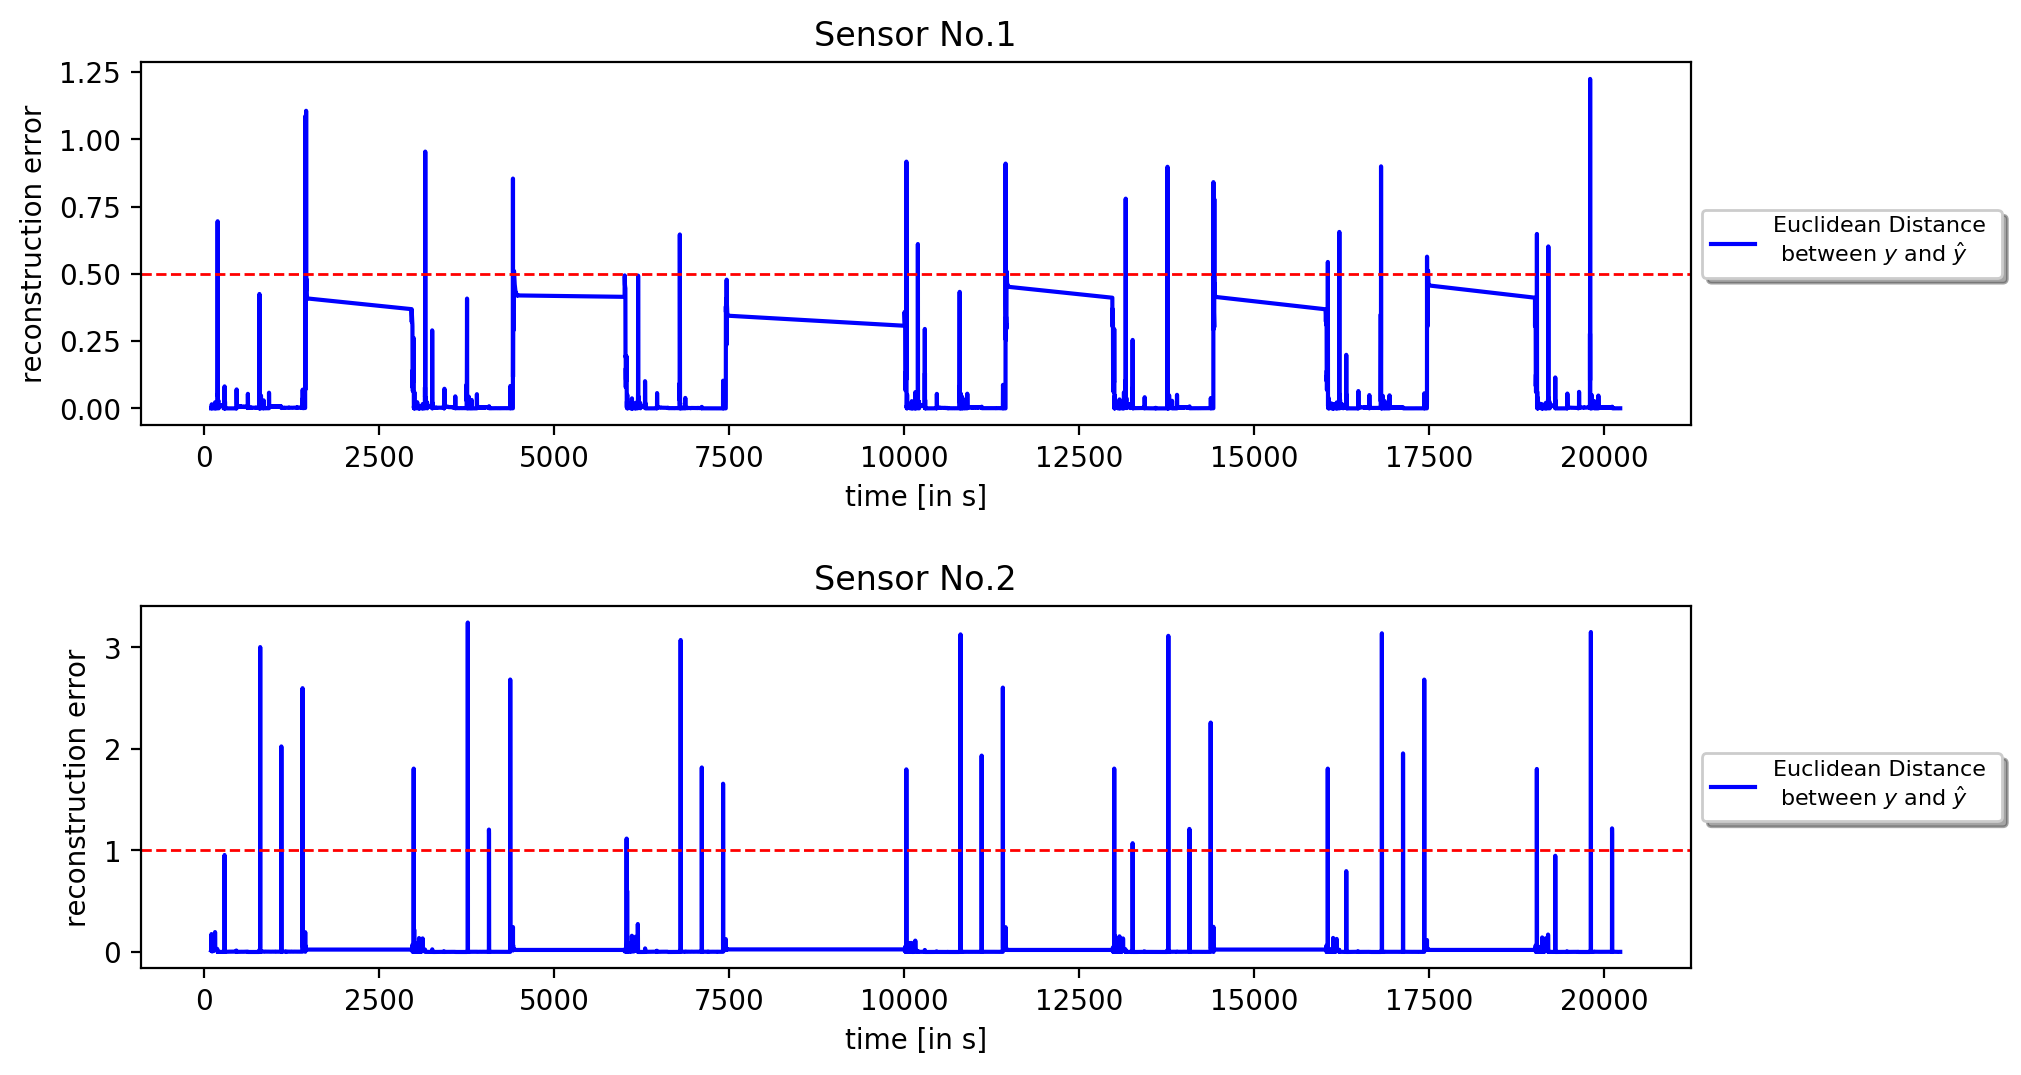

In [36]:
vis_reconstruction_error(dataframe=training_set, 
                         no_features=12, 
                         first_feature=1, 
                         last_feature=3, 
                         thresholds_mean=thresholds_training_mean,
                         thresholds_max=thresholds_training_max,
                         subset=2)
plt.subplots_adjust(hspace=0.5)
plt.savefig("./pictures/re_phm.png")
plt.show()

# Visualisation of Classification
## Failures

In [9]:
all_failures_67 =[3807966., 3814610., 3815890., 3816362., 3856686., 3860122., 3865202., 3867646., 3868170.,
       3870094., 6539522., 6549554., 6572426., 6573162., 6574566., 6575118., 6575566., 6577254., 6582502., 6586022.]

## Examples of predictions before failures 

In [20]:
artifical_data = pd.read_csv("../../files/prediction/MSE/phm_recipe_67.csv", sep=";")
subset_1 = artifical_data.loc[(artifical_data["up time"]>= 3750966) & (artifical_data["up time"]<= 3818362)]

In [18]:
failures = [3807966.]

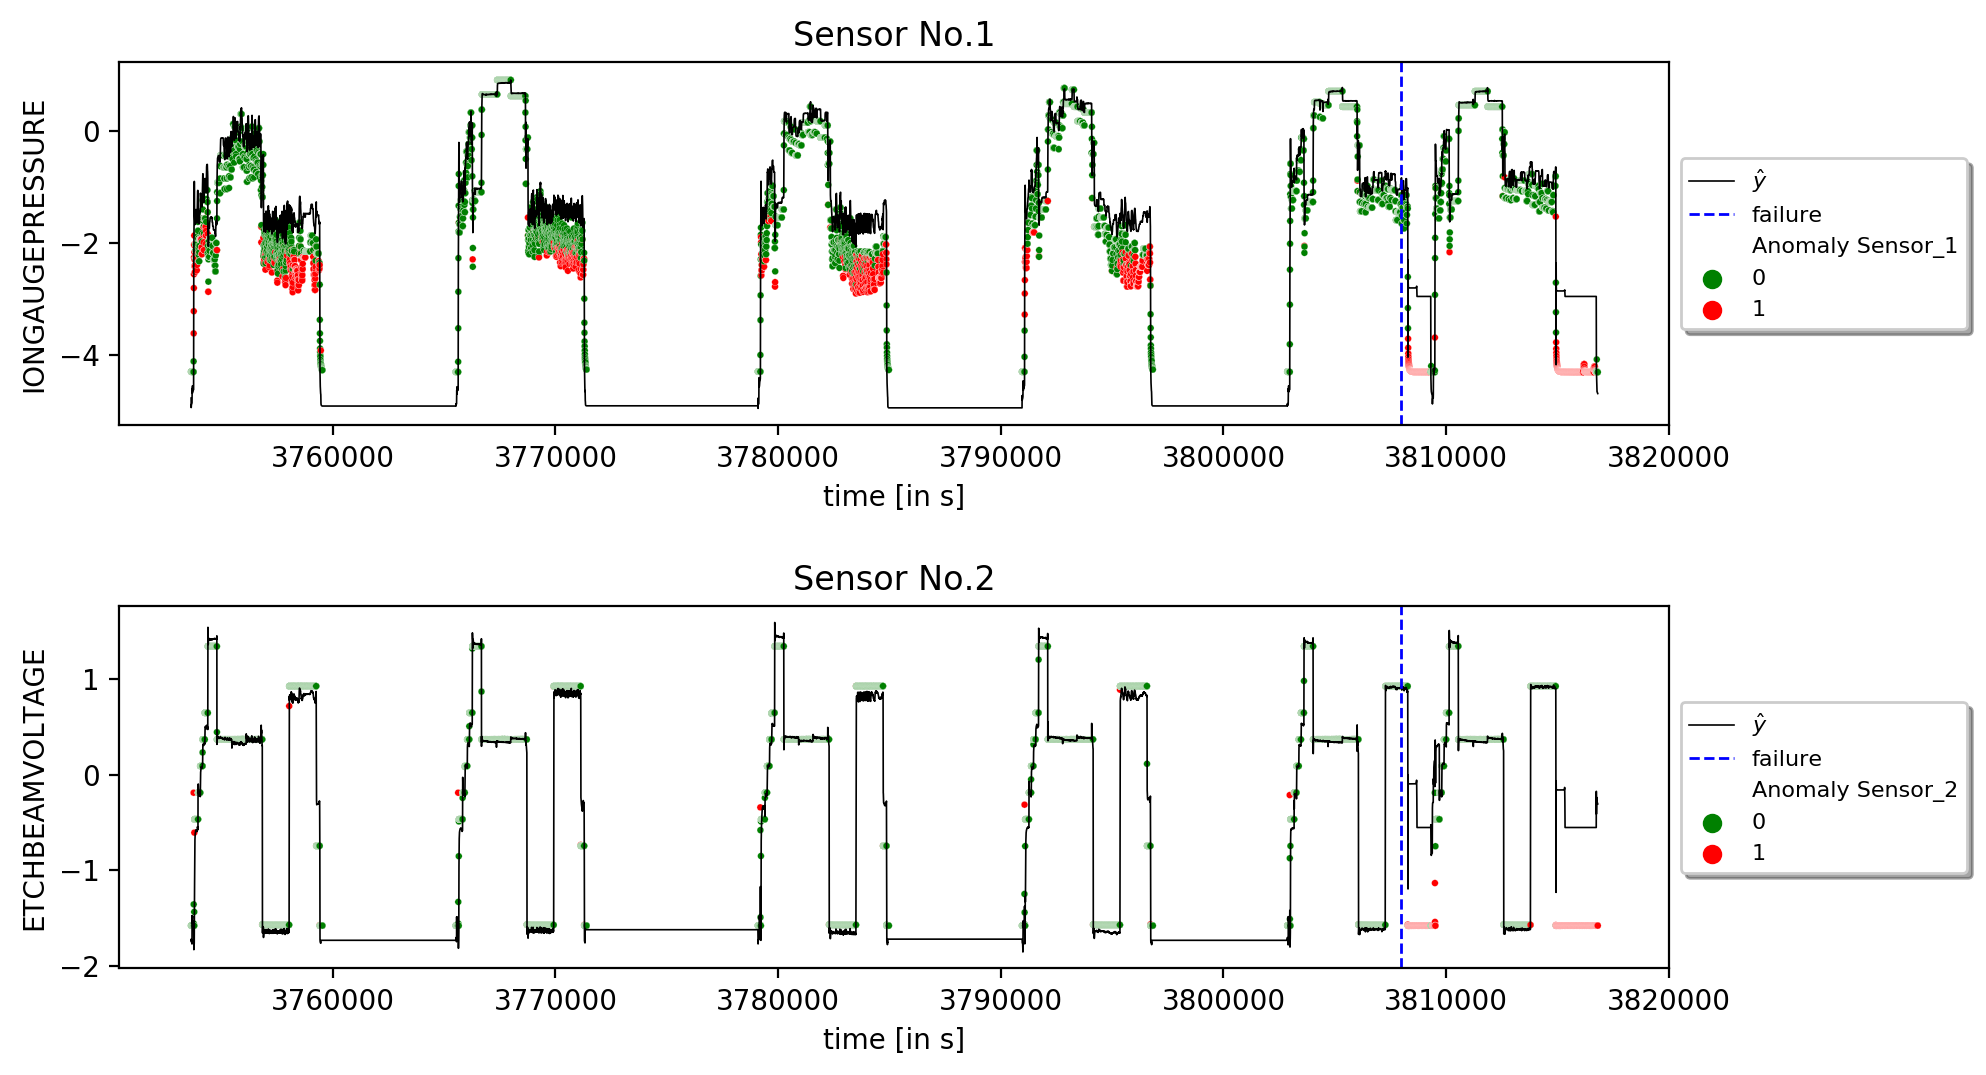

In [21]:
vis_classification(dataframe = subset_1,
                   no_features=12, 
                   first_feature=1, 
                   last_feature=3,
                   line = True,
                   location_line = failures,
                   subset = 2,
                   label_line="failure",
                   name_sensor=name_of_sensor)
plt.subplots_adjust(hspace=0.5)
plt.savefig("./pictures/classfic_phm_0.png")
plt.show()